In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ROCK = 0
PAPER = 1
SCISSORS = 2
NUM_ACTIONS = 3

In [3]:
regret_sum = np.zeros(NUM_ACTIONS)
strategy = np.zeros(NUM_ACTIONS)
strategy_sum = np.zeros(NUM_ACTIONS)
opp_strategy = np.array([0.4, 0.3, 0.3])

In [4]:
def get_strategy():
    normalizing_sum = 0
    for action in range(NUM_ACTIONS):
        strategy[action] = regret_sum[action] if(regret_sum[action] > 0) else 0
        normalizing_sum += strategy[action]
    for action in range(NUM_ACTIONS):
        if(normalizing_sum > 0):
            strategy[action] /= normalizing_sum
        else:
            strategy[action] = 1 / NUM_ACTIONS
        strategy_sum[action] += strategy[action]
    return strategy

In [5]:
def get_action(strategy):
    r = np.random.rand()
    a = 0
    cumulative_probability = 0
    while a < NUM_ACTIONS - 1:
        cumulative_probability += strategy[a]
        if(r < cumulative_probability):
            break
        a += 1
    return a

In [6]:
def train(epochs=1000):
    action_utility = np.zeros(NUM_ACTIONS)
    win_rate = 0
    output = [
        [],
        [],
        []
    ]
    for i in range(epochs): 
        # Get regret-matched mixed-strategy actions
        strategy = get_strategy()
        my_action = get_action(strategy)
        other_action = get_action(opp_strategy)
    
        # Compute action utilities
        action_utility[other_action] = 0        
        
        state = (0 if(other_action == NUM_ACTIONS - 1) else other_action + 1)
        
        state1 = (NUM_ACTIONS - 1 if(other_action == 0) else other_action - 1)
        
        action_utility[state] = 1
        action_utility[state1] = - 1
        
        # Accumulate action regrets
        for action in range(NUM_ACTIONS):
            regret_sum[action] += action_utility[action] - action_utility[my_action]
            output[action].append(regret_sum[action])
            
    plt.plot(output[0])
    plt.plot(output[2])
    plt.show()

In [7]:
def get_average_strategy():
    average_strategy = np.zeros(NUM_ACTIONS)
    normalizing_sum = 0
    for action in range(NUM_ACTIONS):
        normalizing_sum += strategy_sum[action]
    for action in range(NUM_ACTIONS):
        if(normalizing_sum > 0):
            average_strategy[action] = strategy_sum[action] / normalizing_sum
        else:
            average_strategy[action] = 1.0 / NUM_ACTIONS
    return average_strategy

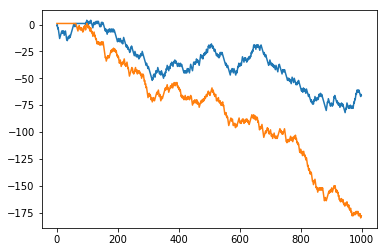

OK


In [8]:
train()
print("OK")

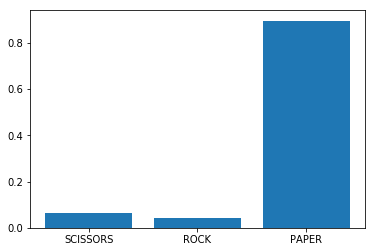

In [11]:
strategy = get_average_strategy()
D = {
    "ROCK":strategy[0],
    "PAPER":strategy[1],
    "SCISSORS":strategy[2]
}

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [10]:
# http://modelai.gettysburg.edu/2013/cfr/cfr.pdf